# SI 618: Data Manipulation and Analysis
## 02 - Introduction to pandas
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
    
Version 2021.01.31.1.CT


## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Sort a DataFrame by index or column
* Group data and calculate aggregate statistics
* Make basic plots (scatter plot, histogram, bar chart, etc)

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas before the end of class.

## Points
All questions are worth a maximum of two points.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
MY_UNIQNAME = 'cyuntao'

## NumPy

Let's set up a couple of plain old python lists

In [2]:
names = ['Alphonso','Beata','Cal','Din','Ella']
scores = [3,5,4,4,5]

### <font color="magenta">Q1: Write code to iterate through the two lists to produce the following output:</font>
```
Alphonso has a score of 3.
Beata has a score of 5.
Cal has a score of 4.
Din has a score of 4.
Ella has a score of 5.
```

In [3]:
for i in range(5):
    print('{} has a score of {}.'.format(names[i], scores[i]))

Alphonso has a score of 3.
Beata has a score of 5.
Cal has a score of 4.
Din has a score of 4.
Ella has a score of 5.


## NumPy

In [4]:
import numpy as np

In [5]:
ar_names = np.array(names)
ar_names

array(['Alphonso', 'Beata', 'Cal', 'Din', 'Ella'], dtype='<U8')

### <font color="magenta">Q2: Create ```ar_scores``` that contains an array of the scores from above:

In [6]:
ar_scores = np.array(scores)
ar_scores

array([3, 5, 4, 4, 5])

Now, let's say we wanted to modify the scores by multiplying each one by 1.25.

### <font color="magenta">Q3: Write some code that would do that using plain old python:</font>

In [7]:
new_scores = []
for score in ar_scores:
    new_scores.append(score * 1.25)
ar_new_scores = np.array(new_scores)

In [8]:
ar_new_scores

array([3.75, 6.25, 5.  , 5.  , 6.25])

## ufuncs

We can use ufuncs to multiply each score by 1.25:

In [9]:
modified_scores = ar_scores * 1.25
modified_scores

array([3.75, 6.25, 5.  , 5.  , 6.25])

### <font color="magenta">Q4: write code to create a new array called sqrt_scores that contains the square roots of each of the original scores</font>

In [10]:
sqrt_scores = ar_scores ** 0.5
sqrt_scores

array([1.73205081, 2.23606798, 2.        , 2.        , 2.23606798])

## pd.Series

In [11]:
import pandas as pd

In [12]:
s_names = pd.Series(names)

In [13]:
s_names

0    Alphonso
1       Beata
2         Cal
3         Din
4        Ella
dtype: object

In [14]:
s_scores = pd.Series(scores)
s_scores

0    3
1    5
2    4
3    4
4    5
dtype: int64

In [15]:
names # just to remind ourselves what names looks like

['Alphonso', 'Beata', 'Cal', 'Din', 'Ella']

In [16]:
s_scores = pd.Series(scores,index=names)
s_scores

Alphonso    3
Beata       5
Cal         4
Din         4
Ella        5
dtype: int64

## pd.DataFrame

In [17]:
df = pd.DataFrame({"name":names,"score":scores})

In [18]:
df

,name,score
0,Alphonso,3
1,Beata,5
2,Cal,4
3,Din,4
4,Ella,5


In [19]:
specializations = ['DS','UX','UX','DS','DS']

In [20]:
df['specialization'] = specializations
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


Let's say we wanted to set the "name" column to be the index:

In [21]:
df.set_index("name")

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [22]:
df.set_index("name",inplace = True) # equivalent to df = df.set_index("name")

In [23]:
df

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [24]:
df.reset_index(inplace = True)
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


# Part 1 (as a group): Mental Health Disorders In the Tech Workplace
From https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata
|Field|Description|
|:----|:----|
|**Timestamp**|
|**Age**| 
|**Gender**
|**Country**
|**state**| If you live in the United States, which state or territory do you live in?
|**self_employed**| Are you self-employed?
|**family_history**| Do you have a family history of mental illness?
|**treatment**| Have you sought treatment for a mental health condition?
|**work_interfere**| If you have a mental health condition, do you feel that it interferes with your work?
|**no_employees**| How many employees does your company or organization have?
|**remote_work**| Do you work remotely (outside of an office) at least 50% of the time?
|**tech_company**| Is your employer primarily a tech company/organization?
|**benefits**| Does your employer provide mental health benefits?
|**care_options**| Do you know the options for mental health care your employer provides?
|**wellness_program**| Has your employer ever discussed mental health as part of an employee wellness program?
|**seek_help**| Does your employer provide resources to learn more about mental health issues and how to seek help?
|**anonymity**| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
|**leave**| How easy is it for you to take medical leave for a mental health condition?
|**mental_health_consequence**| Do you think that discussing a mental health issue with your employer would have negative consequences?
|**phys_health_consequence**| Do you think that discussing a physical health issue with your employer would have negative consequences?
|**coworkers**| Would you be willing to discuss a mental health issue with your coworkers?
|**supervisor**| Would you be willing to discuss a mental health issue with your direct supervisor(s)?
|**mental_health_interview**| Would you bring up a mental health issue with a potential employer in an interview?
|**phys_health_interview**| Would you bring up a physical health issue with a potential employer in an interview?
|**mental_vs_physical**| Do you feel that your employer takes mental health as seriously as physical health?
|**obs_consequence**| Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
|**comments**| Any additional notes or comments



Let's load the usual libraries and also ask for plots to be rendered inside the notebook:

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline

Then read the CSV file into a DataFrame:

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [27]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [28]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
931,2014-08-28 21:47:33,34,male,United States,TX,No,No,No,Often,1-5,...,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,No,* Small family business - YMMV.
130,2014-08-27 12:34:57,33,Male,United States,IL,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Maybe,No,Yes,Some of them,No,Yes,No,No,NaN
493,2014-08-27 16:25:26,24,Female,United States,CA,Yes,Yes,Yes,Sometimes,1-5,...,Don't know,No,No,Some of them,Some of them,No,No,Don't know,Yes,NaN
803,2014-08-28 13:41:51,30,Female,United States,CA,No,No,No,NaN,More than 1000,...,Very easy,No,No,Some of them,No,No,No,Yes,No,NaN
949,2014-08-29 00:43:37,40,Male,United States,WA,No,Yes,Yes,Sometimes,6-25,...,Very easy,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN


Finally, you can get some basic information about the size and shape of the DataFrame:

In [29]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [30]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [31]:
print(df['Country'])

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
             ...      
1254    United Kingdom
1255     United States
1256     United States
1257     United States
1258     United States
Name: Country, Length: 1259, dtype: object


In [32]:
country_state = df[['Country','state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


## Extracting rows

In [33]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [34]:
df.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [35]:
df_gender = df.set_index('Gender')

In [36]:
df_gender.loc['Male']


,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Male,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
Male,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
Male,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
Male,2014-08-27 11:31:22,33,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
Male,2014-08-27 11:32:43,23,Canada,NaN,NaN,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,2015-07-27 23:25:34,30,United States,CA,Yes,Yes,Yes,Often,26-100,No,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
Male,2015-08-17 09:38:35,36,South Africa,NaN,No,Yes,Yes,Often,100-500,No,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN
Male,2015-08-25 19:59:38,36,United States,UT,No,Yes,No,Rarely,More than 1000,No,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN


In [37]:
import traceback
try:
    df.iloc['Gender'] # generates error
except TypeError as e:
    print(traceback.format_exc())

Traceback (most recent call last):
  File "<ipython-input-37-3a2b04f682b6>", line 3, in <module>
    df.iloc['Gender'] # generates error
  File "c:\python\lib\site-packages\pandas\core\indexing.py", line 895, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "c:\python\lib\site-packages\pandas\core\indexing.py", line 1498, in _getitem_axis
    raise TypeError("Cannot index by location index with a non-integer key")
TypeError: Cannot index by location index with a non-integer key



In [38]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

## Sorting
You can use either sort_values() or sort_index():


In [39]:
df_sorted = df.sort_values('Age')
df_sorted.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
282,2014-08-27 14:10:15,18,male,United States,TX,No,No,Yes,Sometimes,6-25,...,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,NaN
287,2014-08-27 14:11:55,18,Male,United States,WA,No,No,No,Never,26-100,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
43,2014-08-27 11:43:10,18,Male,Netherlands,NaN,No,No,No,Often,6-25,...,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No,NaN
482,2014-08-27 16:19:05,18,Female,United Kingdom,NaN,No,Yes,Yes,Sometimes,1-5,...,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,I don't have a job :D


## Filtering using Boolean Masking

In [40]:
df.Age

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [41]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [42]:
df[df['Age'] > 0]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [43]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [44]:
df[  df['Age'] > 40  ]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2015-02-21 11:48:52,41,female,Netherlands,NaN,Yes,No,Yes,Rarely,1-5,...,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Yes,No,The data will be skewed for self-employed peop...
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1243,2015-05-05 14:22:18,43,f,United States,FL,No,Yes,Yes,Rarely,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1248,2015-06-25 12:24:31,41,Female,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,No,Don't know,No,NaN


### Example: Find people who reported a family history of mental health conditions. </font>

Solution:

In [45]:
family_history_mask = df.family_history=='Yes'
df[family_history_mask].tail(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


You can use a simple expression like ```df[df['family_history'] == 'Yes']``` or you can make more complex boolean expressions using parentheses: 


In [46]:
df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
df_filtered.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...


### <font color="magenta">Q5: How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [47]:
df_filtered = df[(df['supervisor'] == 'Yes') | (df['coworkers'] == 'Yes')]
len(df_filtered)

546

### <font color="magenta">Q6: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996). Make appropriate assumptions when constructing your filter. </font>

Here I just make the assumption that the timestamps are made around 2015, and that's when the ages are recorded.

In [48]:
df_millenials = df[(df['Age'] > 20) & (df['Age'] < 40)]
df_millenials.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN


**NOTE: We will still use df for the following analysis**

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [49]:
df['Age'].mean()

79428148.31135821

### Does that look right?  What should we do?

### <font color="magenta">Q7: What is the _median_ age of the survey sample?  </font>

In [50]:
df['Age'].median()

31.0

### <font color="magenta">Q8: Write one line of code to compute basic statistics (mean, standard deviation, min, 25% percentile, etc) about Age  </font>

Hint: see the readings

In [51]:
df[(df['Age'] < 100) & (df['Age'] > 18)].Age.describe()

count    1244.000000
mean       32.155949
std         7.231587
min        19.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [52]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [53]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Example: Write one line of code to count the occurrences of the countries and show the top 5 countries.  </font>

Solution:

In [54]:
df.Country.value_counts().head(6)

United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Name: Country, dtype: int64

Are you sure that's correct?
Not quite correct at first, as Netherlands and Ireland are tier 5.

### <font color="magenta">Q9: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [55]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

Most companies have between 6-25 employees, and only a few companies have between 500-1000 employees. In principle, the number of companies is inversely proportional to the number of employees.

### <font color="magenta">Q10: Among the people from United States, how many repondents were there from each state?  </font>

In [56]:
df[df.Country == 'United States'].state.value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
MO     12
WI     12
GA     12
UT     10
CO      9
AL      8
MD      7
AZ      7
NJ      6
OK      6
SC      5
KY      5
CT      4
IA      4
DC      4
KS      3
SD      3
NH      3
VT      3
NV      3
WY      2
NE      2
NM      2
MS      1
LA      1
ME      1
ID      1
RI      1
WV      1
Name: state, dtype: int64

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

<AxesSubplot:>

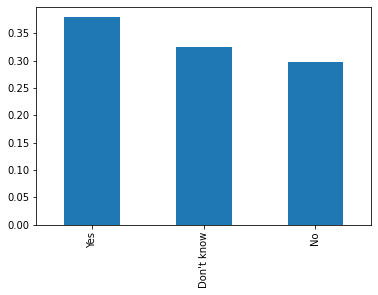

In [57]:
df.benefits.value_counts(normalize=True).plot.bar()

Example: Create a histogram of the distribution of Age values:

<AxesSubplot:ylabel='Frequency'>

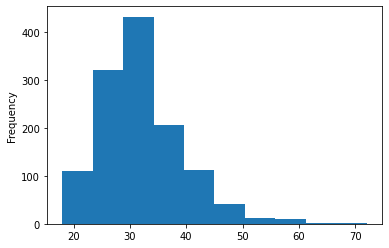

In [58]:
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist()

### <font color="magenta">Q11: Experiment with the number of bins in the histogram of the Age distribution.  Is there a "best" value?</font>

Hint: use the bins= option to plot()

<AxesSubplot:ylabel='Frequency'>

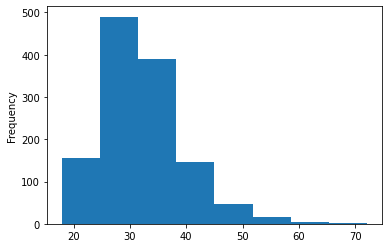

In [59]:
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist(bins=8)

## Aggregation

Example: Find the number of participants from each state.

Solution:

In [60]:
df.groupby('state').size()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     29
IN     27
KS      3
KY      5
LA      1
MA     20
MD      8
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     57
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     11
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
dtype: int64

### <font color="magenta">Q12: Find the median age of people for each state. </font>

In [61]:
df.groupby('state').median()

,Age
state,
AL,34.0
AZ,33.0
CA,31.0
CO,31.0
CT,37.5
DC,37.5
FL,34.0
GA,30.0
IA,40.0


# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

## Time to load some data:

In [62]:
titles = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/titles.csv', index_col=None)

The titles DataFrame contains a list of movie titles and release year

In [63]:
# cast = pd.read_csv('data/cast.zip', index_col=None)
cast = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/cast.zip', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [64]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [65]:
cast.sample(5)

,title,year,name,type,character,n
122394,The Spirithunter,2004,Rique Baloyra,actor,Francois,13.0
3282806,The Antwerp Dolls,2015,Clova Perez-Corral,actress,Mikaela,NaN
2888855,Forces of Nature,1999,Anne Haney,actress,Emma,18.0
1552065,Hunting Elephants,2013,Moni Moshonov,actor,Nick,2.0
1348228,Jing wu feng yun: Chen Zhen,2010,Yue Ma,actor,General Zhou,11.0


### <font color="magenta">Q13: How many entries are there in the cast table?</font>

In [66]:
len(cast)

3634467

### <font color="magenta">Q14: How many entries are there in the titles table?</font>

In [67]:
len(titles)

232330

### <font color="magenta">Q15: What are the two earliest movies?</font>

In [68]:
titles.sort_values('year').head(3)

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898
124505,Reproduction of the Corbett and Jeffries Fight,1899


'Miss Jerry' and 'The Startled Lover'

### <font color="magenta">Q16: How many movies have the title "Hamlet"?</font>

In [69]:
len(titles[titles['title'] == 'Hamlet'])

18

### <font color="magenta">Q17: List all of the "Treasure Island" movies from earliest to most recent.</font>

In [70]:
titles[titles['title'] == 'Treasure Island'].sort_values('year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


### <font color="magenta">Q18: List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.</font>

In [71]:
cast[(cast['name'] == 'Cary Grant') & (cast['n'] == 2) & (cast['year'] > 1939) & (cast['year'] < 1950)].sort_values('year')

,title,year,name,type,character,n
845513,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
845523,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### <font color="magenta">Q19: What are the ten most common movie names of all time?</font>

In [72]:
titles['title'].value_counts().head(11)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Kismet                  11
Freedom                 11
Temptation              11
Othello                 11
The Three Musketeers    11
Anna Karenina           10
Name: title, dtype: int64

### <font color="magenta">Q20: Plot the number of "Hamlet" films made each decade</font>

Make sure your decades are in chronological order on the x-axis

<AxesSubplot:>

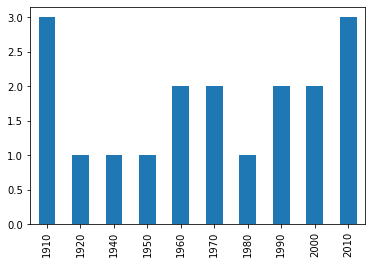

In [74]:
hamlet = titles[titles['title'] == 'Hamlet'].copy()
hamlet['decade'] = hamlet['year'] // 10 * 10    # // means floor divide
hamlet.decade.value_counts().sort_index().plot.bar()

### Stretch goals
The following questions are extra material and need not be completed as part of this
notebook.  We will, however, start next class by considering this material, so it's 
worth attempting if you have time.

### EXTRA (no points): <font color="magenta">Q21: Who are the 10 people most often credited as "Herself" in film history?</font>

In [ ]:
# insert code here

### EXTRA (no points): <font color="magenta">Q22: What are the 10 most frequent roles that start with the word "Science"?</font>
Hint: read docs on str.startswith()

In [ ]:
# insert code here

### EXTRA (no points): <font color="magenta">Q23: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?  How many supporting (n=2) roles were available to actors,and how many to actresses, in the 1950s?</font>

In [ ]:
# insert code here

### EXTRA (no points): <font color="magenta">Q24: Comment on the differences in gender ratios for leading vs. supporting roles in the 1950s.  Does there appear to be a bias?</font>

Insert your response here.